[<pyspike.SpikeTrain.SpikeTrain object at 0x7f1902ca56d8>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f195d1eb860>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c43198>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c431d0>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c432b0>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c43208>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f190305be48>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a898>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a6a0>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a6d8>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a710>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a668>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a630>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a5f8>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a2b0>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a7b8>, <pyspike.SpikeTrain.SpikeTrain object at 0x7f1902c3a7f0>, <pyspike.Spik

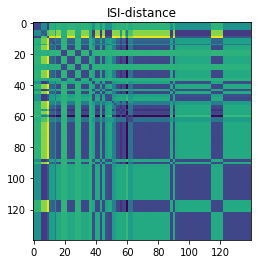

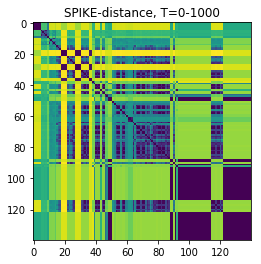

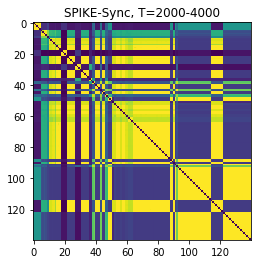

In [3]:
import pickle
import numpy as np
from neuronunit.tests.dynamics import ISITest, LocalVariationTest
import pyspike
import matplotlib as mpl
#mpl.use('Agg')

import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  print(mdf1)

with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:
  mdf2 = pickle.load(f)
  print(mdf2)

try:
    with open('membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf3 = pickle.load(f)
       print(mdf3)

    with open('membrane_dynamics_file.p','rb') as f:
       mdf = pickle.load(f)

    with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf0 = pickle.load(f)
       print(mdf0)

except:
   pass



# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)

wrangled_trains = []
for spiketrain in mdf1.spiketrains:
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,2000))
    wrangled_trains.append(pspikes)
    print(pspikes)

    """ Class representing spike trains for the PySpike Module.
    def __init__(self, spike_times, edges, is_sorted=True):
    Constructs the SpikeTrain.

    :param spike_times: ordered array of spike times.
    :param edges: The edges of the spike train. Given as a pair of floats
                  (T0, T1) or a single float T1, where then T0=0 is
                  assumed.
    :param is_sorted: If `False`, the spike times will sorted by `np.sort`.

    """


spike_trains = wrangled_trains
print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, 2000))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()
plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, 2000))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()
#plt.savefig('the distances')

In [2]:
!pip install pyspike